In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from statistics import mean
%matplotlib inline

In [2]:
boston = load_boston()

C:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

In [3]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

df['Price'] = boston.target

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


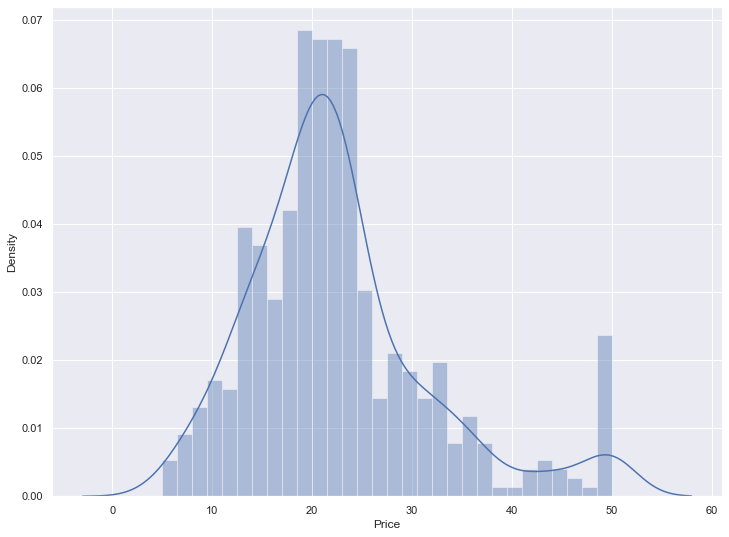

In [6]:
sns.set(rc={'figure.figsize':(12,9)})
sns.distplot(df['Price'], bins=30)

plt.show()

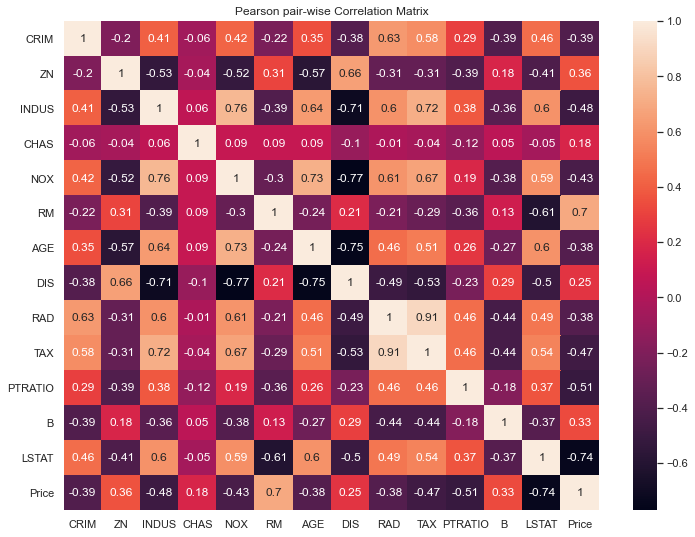

In [7]:
# compute the pair wise correlation for all columns  
correlation_matrix = df.corr(method='pearson').round(2)
 
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

plt.title('Pearson pair-wise Correlation Matrix')
plt.show()

In [8]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM'], df['CRIM'], df['NOX']], columns=['LSTAT', 'RM', 'CRIM', 'NOX'])
Y = df['Price']
col_names=X.columns

sc=StandardScaler()
#X=preprocessing.normalize(X)
X=pd.DataFrame(sc.fit_transform(X),columns=col_names)

print(X.shape)
print(Y.shape)

(506, 4)
(506,)


In [9]:
X_train1, X_test, Y_train1, Y_test = train_test_split(X, Y, test_size=100, random_state=5)

X_train, X_val, Y_train, Y_val = train_test_split(X_train1,Y_train1, test_size=100, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(306, 4)
(100, 4)
(306,)
(100,)


In [10]:
#"Creates a polynomial regression model for the given degree"
def regression(X_train,Y_train,X_val,Y_val,X_test,Y_test):
    degrees=[]
    rmse_train=[]
    rmse_val=[]
    for i in range(1,11):
        poly_features = PolynomialFeatures(degree=i)
        
        
        # transform the features to higher degree features.
        X_train_poly = poly_features.fit_transform(X_train)
        X_val_poly = poly_features.fit_transform(X_val)
        #print(X_train)
        #print(X_train_poly)
        

        # fit the transformed features to Linear Regression
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, Y_train)
        
        # predicting on training data-set
        Y_train_predicted = poly_model.predict(X_train_poly)
        rmse= mean_squared_error(Y_train, Y_train_predicted)
        rmse_train.append(rmse)
        
        #Validation Step
        Y_val_predicted= poly_model.predict(X_val_poly)
        rmse1= mean_squared_error(Y_val, Y_val_predicted)
        
        rmse_val.append(rmse1)
        degrees.append(i)
        
    # predicting on test data-set
    print(rmse_val)
    min_rmse_val_idx= rmse_val.index(min(rmse_val))
    best_degree= degrees[min_rmse_val_idx]
    
    print("Lowest error is: " + str(min(rmse_val)) +" at degree= " +  str(best_degree))
    
    poly_features = PolynomialFeatures(degree=best_degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly=poly_features.fit_transform(X_test)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, Y_train)
        
    Y_test_predicted = poly_model.predict(X_test_poly)
    return[best_degree,Y_train, Y_train_predicted, Y_val, Y_val_predicted,Y_test,Y_test_predicted]

In [11]:
[best_degree,Y_train, Y_train_predicted, Y_val, Y_val_predicted,Y_test,Y_test_predicted]=regression(X_train,Y_train,X_val,Y_val,X_test,Y_test)

[23.072106617113526, 15.492324363358437, 58.938030663771876, 49124.355041890034, 1261766676.310849, 8695224600236.222, 2.58302119598818e+21, 2.82694460533335e+18, 7.288640306995983e+19, 1.6800655135803687e+20]
Lowest error is: 15.492324363358437 at degree= 2


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


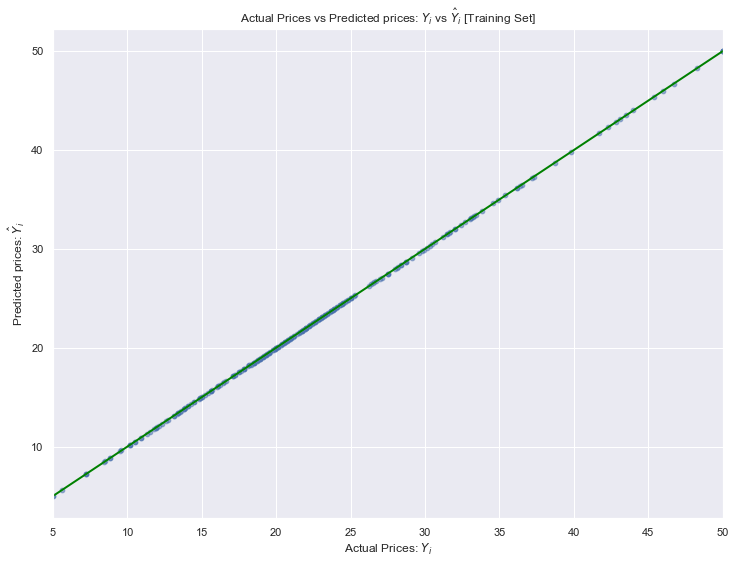

In [12]:
sns.scatterplot(Y_train, Y_train_predicted, alpha=0.4)
sns.regplot(Y_train, Y_train_predicted, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Training Set]")
 
plt.show()

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


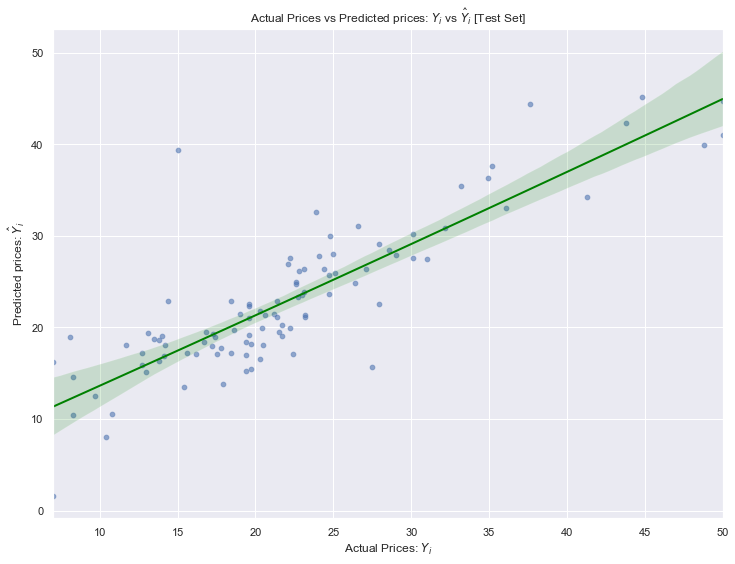

In [13]:
sns.scatterplot(Y_test, Y_test_predicted, alpha=0.4)
sns.regplot(Y_test, Y_test_predicted, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)
 
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ [Test Set]")
 
plt.show()

In [14]:
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_predicted))
r2_train = r2_score(Y_train, Y_train_predicted)
     
print("The polynomial model performance for the training set")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

The polynomial model performance for the training set
RMSE of training set is 6.731584640376147e-07
R2 score of training set is 0.9999999999999948


In [15]:
# evaluating the model on test data-set
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_predicted))
r2_test = r2_score(Y_test, Y_test_predicted)

print("The polynomial model performance for the test set")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The polynomial model performance for the test set
RMSE of test set is 4.615432369151896
R2 score of test set is 0.7330271566828823


In [16]:
poly_features = PolynomialFeatures(degree=best_degree)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly=poly_features.fit_transform(X_val)
X_test_poly=poly_features.fit_transform(X_test)
    
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
print(poly_model.score(X_test_poly, Y_test))

0.7330271566828823


In [17]:
#REGULARIZATION
#RIDGE (l2) REGRESSION
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 30):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train_poly, Y_train)
    scores = cross_val_score(ridgeModel, X_val_poly, Y_val, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 
#Loop to print the different values of cross-validation scores
#for i in range(0, len(alpha)):
 #   print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))
best_alpha=alpha[cross_val_scores_ridge.index(max(cross_val_scores_ridge))]

In [18]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = best_alpha)
ridgeModelChosen.fit(X_train_poly, Y_train)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test_poly, Y_test))

0.7638365840887065


In [19]:
#LASSO (L1) REGRESSION:
# List to maintain the cross-validation scores
cross_val_scores_lasso = []
 
# List to maintain the different values of Lambda
Lambda = []
 
# Loop to compute the cross-validation scores
for i in range(1, 30):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train_poly, Y_train)
    scores = cross_val_score(lassoModel, X_val_poly, Y_val, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
#for i in range(0, len(alpha)):
 #   print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))
best_lambda=Lambda[cross_val_scores_lasso.index(max(cross_val_scores_lasso))]

In [20]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = best_lambda, tol = 0.0925)
lassoModelChosen.fit(X_train_poly, Y_train)
 
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test_poly, Y_test))

0.8163137589661755


In [21]:
# Building the two lists for visualization
models = ['Linear/Polynomial Regression', 'Ridge Regression', 'Lasso Regression']
scores = [poly_model.score(X_test_poly, Y_test),
         ridgeModelChosen.score(X_test_poly, Y_test),
         lassoModelChosen.score(X_test_poly, Y_test)]
 
# Building the dictionary to compare the scores
mapping = {}
mapping['Linear/Polynomial Regression'] = poly_model.score(X_test_poly, Y_test)
mapping['Ridge Regression'] = ridgeModelChosen.score(X_test_poly, Y_test)
mapping['Lasso Regression'] = lassoModelChosen.score(X_test_poly, Y_test)
 
# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

print("Best Alpha for Ridge Regression Model:" , best_alpha)
print("Best Lamda for Lasso Regression Model:" , best_lambda)

Linear/Polynomial Regression : 0.7330271566828823
Ridge Regression : 0.7638365840887065
Lasso Regression : 0.8163137589661755
Best Alpha for Ridge Regression Model: 6.5
Best Lamda for Lasso Regression Model: 0.5


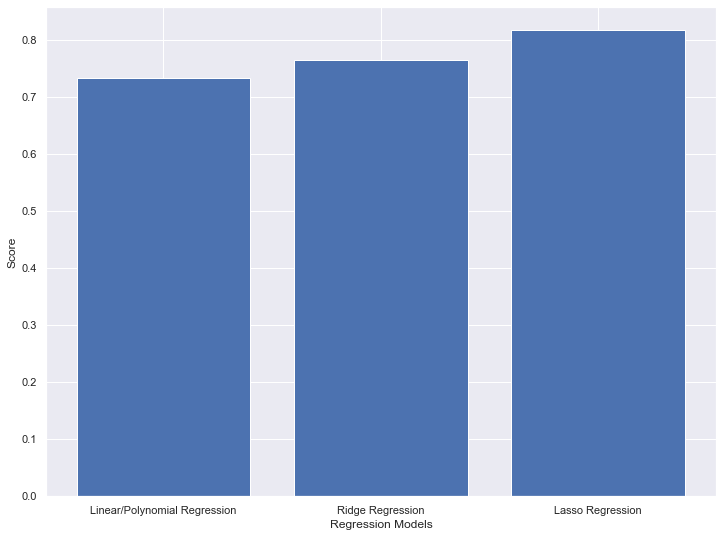

In [22]:
# Plotting the scores
plt.bar(models, scores)
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.show()